Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
# load the data set bank-full.csv
df = pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.shape

(45211, 17)

In [9]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [11]:
# basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
# There are no nullvalues

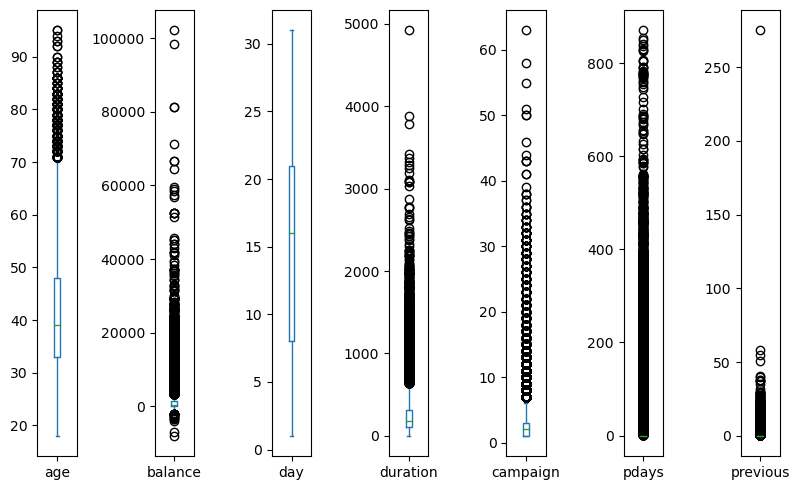

In [14]:
# univariate analysis of a numeric features
df.plot(kind = 'box',subplots = True , figsize = (8,5))
plt.tight_layout();

In [48]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [49]:
# One-Hot Encoding of categrical variables
ohe_df=pd.get_dummies(df,columns=['job','marital','education','contact','poutcome','month'])
ohe_df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
# Custom Binary Encoding of Binary  variables 
ohe_df['default'] = np.where(ohe_df['default'].str.contains("yes"), 1, 0)
ohe_df['housing'] = np.where(ohe_df['housing'].str.contains("yes"), 1, 0)
ohe_df['loan'] = np.where(ohe_df['loan'].str.contains("yes"), 1, 0)
ohe_df['y'] = np.where(ohe_df['y'].str.contains("yes"), 1, 0)
ohe_df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [52]:
# devide the data into target and independent features
x = ohe_df.drop('y',axis = 1)
y = ohe_df['y']

In [55]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [56]:
# instantiate a linear regression model
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [58]:
lr.coef_

array([[-3.47543745e-02, -1.18556665e-02,  4.95287357e-05,
        -3.90042343e-01, -1.05731888e-01, -3.26244644e-02,
         4.20926727e-03, -4.97875898e-01,  1.70559378e-03,
         1.36424209e-01, -1.62768337e-02, -1.49642046e-01,
        -1.54854610e-02, -2.83025056e-03,  6.16910304e-03,
         9.58286203e-02, -1.00820800e-02, -5.13622224e-02,
         1.67588117e-02, -4.21579932e-02,  5.69449712e-05,
         1.50505848e-03,  1.09690369e-02, -9.52385809e-02,
        -8.32488042e-02, -3.58191186e-02, -1.66873179e-01,
         2.74689705e-02,  7.70497890e-03,  4.96619900e-02,
         2.85772045e-02, -2.45757543e-01, -6.43933987e-02,
        -1.51992751e-02,  1.71527633e-01, -2.59453307e-01,
         2.43274165e-02,  1.00427077e-02,  1.53405663e-02,
        -1.34247448e-02, -3.01366302e-03, -4.80020079e-02,
        -3.14526906e-02,  4.59206652e-02, -2.46639032e-01,
        -2.10781984e-02,  5.86245719e-02,  4.18360610e-02]])

In [59]:
lr.intercept_

array([-0.16752722])

## Model Prediction on Train & Test Data

In [60]:
# get the prediction of the model on the training and test data
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

In [61]:
pred_train[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
pred_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
# probability predictions
pred_prob_train = lr.predict_proba(x_train)
pred_prob_test = lr.predict_proba(x_test)

In [65]:
pred_prob_train

array([[9.51420265e-01, 4.85797352e-02],
       [9.90138793e-01, 9.86120669e-03],
       [8.94747009e-01, 1.05252991e-01],
       ...,
       [9.89926509e-01, 1.00734912e-02],
       [9.99767913e-01, 2.32087002e-04],
       [9.03226252e-01, 9.67737476e-02]])

In [66]:
pred_prob_test

array([[9.86676176e-01, 1.33238243e-02],
       [9.58192079e-01, 4.18079210e-02],
       [7.66433698e-01, 2.33566302e-01],
       ...,
       [9.84137405e-01, 1.58625948e-02],
       [9.99883396e-01, 1.16604006e-04],
       [9.63249574e-01, 3.67504263e-02]])

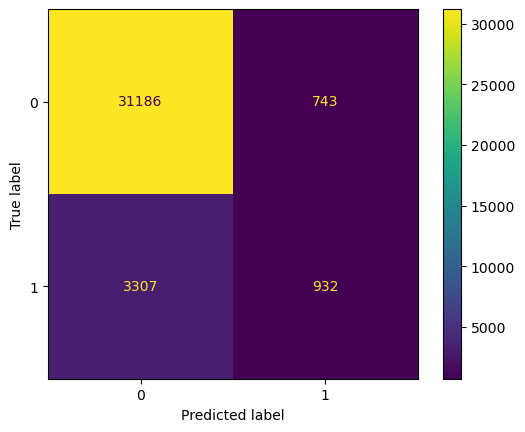

In [67]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
# generate confusion matrix using the estimator on training data predictions
ConfusionMatrixDisplay.from_estimator(lr, x_train, y_train)
plt.grid(False);

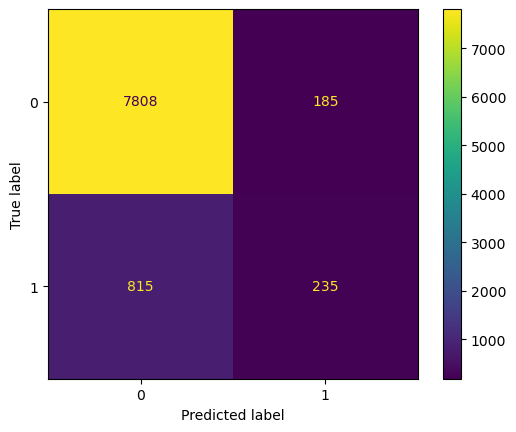

In [69]:
# confusion metric display on test data set
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test)
plt.grid(False);

In [70]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
acc_train, acc_test

(0.8880225613802256, 0.8894172287957536)

In [71]:
# We got similar accuracy score on train and test data, the model is performing better

In [72]:
# classification report
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.22      0.32      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.60      0.63     36168
weighted avg       0.86      0.89      0.87     36168



In [73]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7993
           1       0.56      0.22      0.32      1050

    accuracy                           0.89      9043
   macro avg       0.73      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



In [74]:
# roc curve with diagonal line and auc score
from sklearn.metrics import RocCurveDisplay

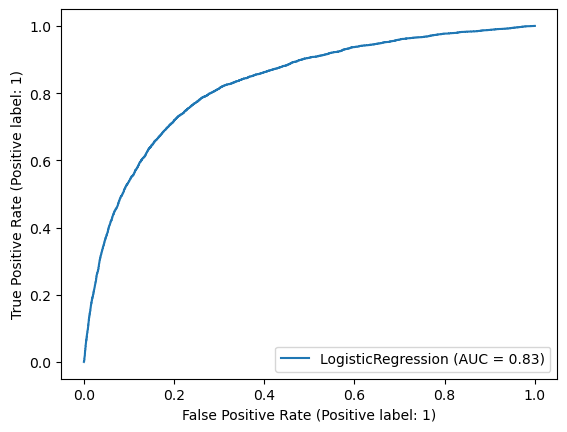

In [75]:
RocCurveDisplay.from_estimator(lr, x_train, y_train);

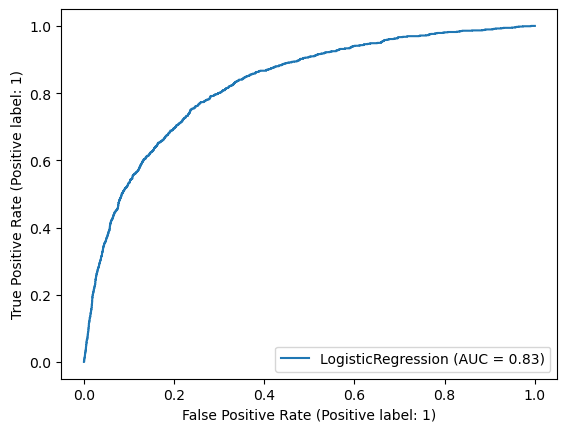

In [76]:
RocCurveDisplay.from_estimator(lr, x_test, y_test);

# The model is giving similar performance on train and test data